In [1]:
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import gc

In [2]:
from google.colab import drive
drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/Florida-Coral-Reef'
os.chdir(folder_path)


Mounted at /content/drive


## Determine whether there are significant differences in the living tissue area of stony corals between monitoring sites.

In [3]:
from scipy.stats import kruskal, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [4]:
path = "dataset/"

df= pd.read_csv(path+'CREMP_SCOR_Summaries_2023_LTA.csv')
species_columns = df.columns[6:]  # All species columns
df['Total_Tissue_Area'] = df[species_columns].sum(axis=1)
site_data = df.groupby('Site_name')['Total_Tissue_Area'].apply(list).reset_index()

In [ ]:
f_stat, p_value = f_oneway(*site_data['Total_Tissue_Area'])
print(f"ANOVA p-value: {p_value:.4f}")

# Post-hoc Tukey HSD
tukey = pairwise_tukeyhsd(
    endog=df['Total_Tissue_Area'],
    groups=df['Site_name'],
    alpha=0.05
)
print(tukey.summary())

ANOVA p-value: 0.0000
                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                       
        group1                group2          meandiff   p-adj     lower        upper     reject
------------------------------------------------------------------------------------------------
              Admiral        Alligator Deep   -6210.7923    1.0  -34969.3427   22547.7581  False
              Admiral     Alligator Shallow   -7210.3019    1.0  -35968.8523   21548.2485  False
              Admiral             Burr Fish   26536.1714 0.1803   -3145.3471   56217.6899  False
              Admiral        Carysfort Deep   12576.7519 0.9998  -16181.7985   41335.3023  False
              Admiral     Carysfort Shallow    1907.8269    1.0  -26850.7235   30666.3773  False
              Admiral           Cliff Green   81794.5673    0.0   53036.0169  110553.1177   True
              Admiral            Conch Deep    6346.2555    1.0  -22552.9243   35245.4354  False
        

In [ ]:
# Kruskal-Wallis test
h_stat, p_value = kruskal(*site_data['Total_Tissue_Area'])
print(f"Kruskal-Wallis p-value: {p_value:.4f}")

# Post-hoc Dunn's test with Bonferroni correction
from scikit_posthocs import posthoc_dunn
dunn_results = posthoc_dunn(df, val_col='Total_Tissue_Area', group_col='Site_name')


Kruskal-Wallis p-value: 0.0000


ModuleNotFoundError: No module named 'scikit_posthocs'

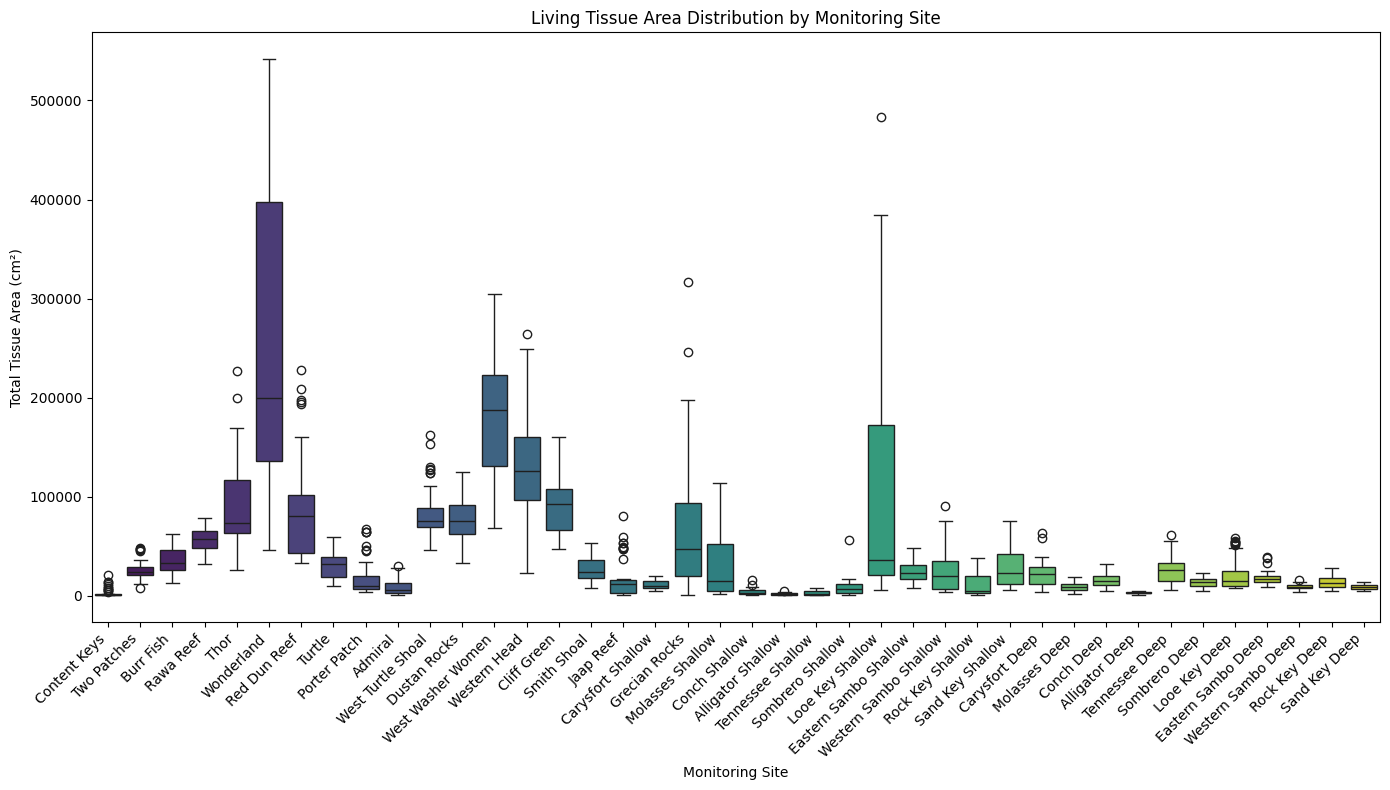

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=df,
    x='Site_name',
    y='Total_Tissue_Area',
    palette='viridis'
)
plt.xticks(rotation=45, ha='right')
plt.title('Living Tissue Area Distribution by Monitoring Site')
plt.ylabel('Total Tissue Area (cm²)')
plt.xlabel('Monitoring Site')
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Tukey HSD Group Comparisons')

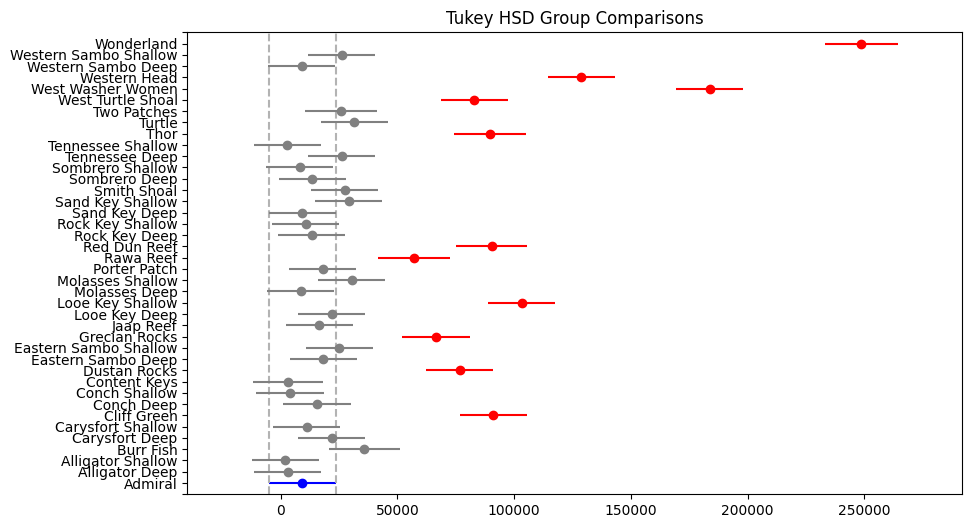

In [ ]:
# Plot post-hoc results
tukey.plot_simultaneous(
    comparison_name=site_data['Site_name'].iloc[0],
    figsize=(10, 6)
)
plt.title('Tukey HSD Group Comparisons')


In [5]:
geo = pd.read_csv('dataset/CREMP_Stations_2023.csv')
geo

,OID_,Region,Site_Code,SiteID,Site_name,Habitat,Subregion,StationID,First_Year_surveyed,length_m,Depth_ft,latDD,lonDD,latDeg,latMin,lonDeg,lonMin
0,29,FKNMS,9H1,10,Rattlesnake,HB,UK,101,1996,23,6,25.1736,-80.3475,25.0,10.416,-80.0,20.850
1,30,FKNMS,9H1,10,Rattlesnake,HB,UK,102,1996,22,6,25.1736,-80.3475,25.0,10.416,-80.0,20.850
2,31,FKNMS,9H1,10,Rattlesnake,HB,UK,103,1996,23,6,25.1736,-80.3475,25.0,10.416,-80.0,20.850
3,32,FKNMS,9H1,10,Rattlesnake,HB,UK,104,1996,25,6,25.1736,-80.3475,25.0,10.416,-80.0,20.850
4,33,FKNMS,9H2,11,El Radabob,HB,UK,111,1996,22,9,25.1201,-80.3782,25.0,7.206,-80.0,22.692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,239,FKNMS,5D5,80,Rock Key Deep,OD,LK,804,1996,21,40,24.4532,-81.8568,24.0,27.192,-81.0,51.408
180,240,FKNMS,2D1,81,Sand Key Deep,OD,LK,811,1996,22,35,24.4517,-81.8798,24.0,27.102,-81.0,52.788
181,241,FKNMS,2D1,81,Sand Key Deep,OD,LK,812,1996,22,34,24.4517,-81.8798,24.0,27.102,-81.0,52.788
182,242,FKNMS,2D1,81,Sand Key Deep,OD,LK,813,1996,22,33,24.4517,-81.8798,24.0,27.102,-81.0,52.788


In [8]:
merged = df.merge(geo[['StationID',	'length_m',	'Depth_ft',	'latDD', 'lonDD']], on = 'StationID', how='left' )
merged.head(5)

,Year,Date,Subregion,Habitat,SiteID,Site_name,StationID,Acropora_cervicornis,Acropora_palmata,Acropora_prolifera,...,Siderastrea_siderea,Solenastrea_bournoni,Solenastrea_hyades,Stephanocoenia_intersepta,Undaria_agaricites_complex,Total_Tissue_Area,length_m,Depth_ft,latDD,lonDD
0,2011,5/14/2011,LK,BCP,18,Content Keys,181,0.0,0.0,0.0,...,149.2,0.0,0.0,0.0,0.0,1846.4,23,18,24.8221,-81.4889
1,2011,5/14/2011,LK,BCP,18,Content Keys,182,0.0,0.0,0.0,...,23.8,0.0,0.0,7459.1,0.0,8040.3,23,18,24.8221,-81.4889
2,2011,5/14/2011,LK,BCP,18,Content Keys,183,0.0,0.0,0.0,...,150.6,0.0,0.0,0.0,0.0,998.8,24,18,24.8221,-81.4889
3,2011,5/14/2011,LK,BCP,18,Content Keys,184,0.0,0.0,0.0,...,165.0,0.0,0.0,0.0,0.0,1462.7,22,18,24.8221,-81.4889
4,2011,6/6/2011,UK,P,21,Two Patches,211,0.0,0.0,0.0,...,6727.0,614.6,0.0,211.8,103.5,7937.4,21,8,25.0219,-80.4390


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

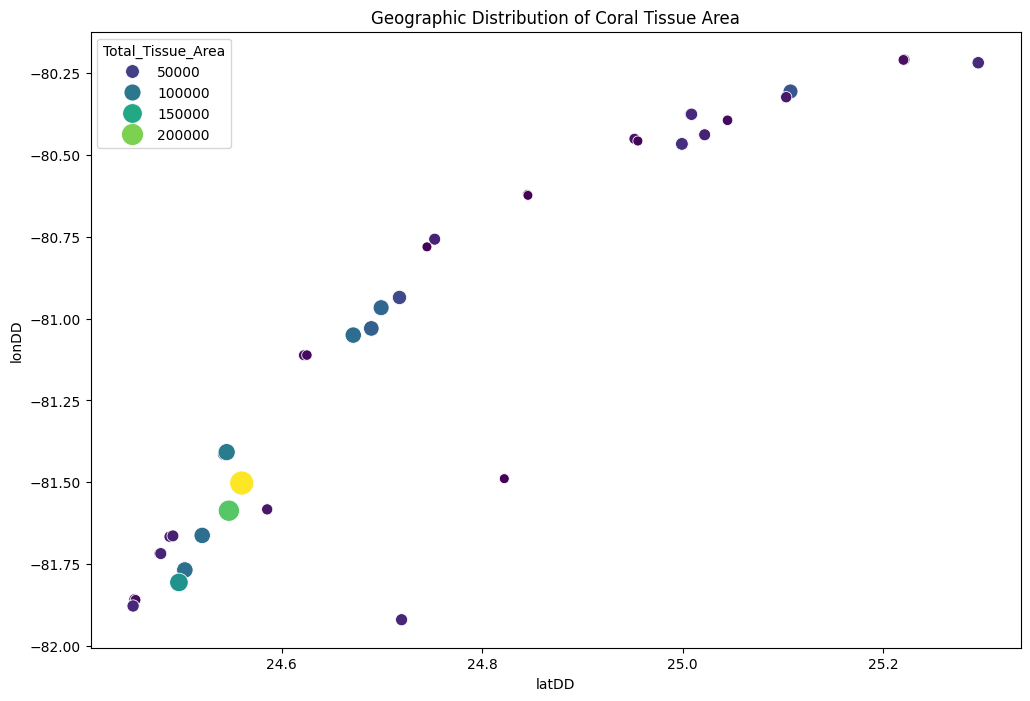

In [9]:
# If coordinate data exists
site_agg = merged.groupby('Site_name').agg({
    'Total_Tissue_Area': 'mean',
    'latDD': 'first',
    'lonDD': 'first'
})

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=site_agg,
    x='latDD',
    y='lonDD',
    size='Total_Tissue_Area',
    hue='Total_Tissue_Area',
    palette='viridis',
    sizes=(50, 300)
)
plt.title('Geographic Distribution of Coral Tissue Area')
plt.colorbar(label='Mean Tissue Area (cm²)')


In [ ]:
import plotly.express as px

fig = px.parallel_categories(
    df,
    dimensions=['Subregion', 'Habitat', 'Site_name'],
    color='Total_Tissue_Area',
    title='Tissue Area Distribution Across Site Characteristics'
)
fig.show()


## Assess spatial patterns in the distribution of different coral species and how these patterns change over time.

In [ ]:
path = "dataset/"

loc = pd.read_csv(path+'CREMP_Stations_2023.csv')
scor= pd.read_csv(path+'CREMP_SCOR_RawData_2023.csv')
octo= pd.read_csv(path+'CREMP_OCTO_RawData_2023.csv')

scor = scor.add_prefix('scor_')
octo = octo.add_prefix('octo_')

,octo_Year,octo_Date,octo_Subregion,octo_Habitat,octo_SiteID,octo_Site_name,octo_StationID,octo_SPP_Code,octo_sciName,octo_Height_cm
0,2011,6/8/2011,UK,P,32,Porter Patch,321,PAME,Pseudopterogorgia americana,9.0
1,2011,6/8/2011,UK,P,32,Porter Patch,321,PAME,Pseudopterogorgia americana,54.0
2,2011,6/8/2011,UK,P,32,Porter Patch,321,PAME,Pseudopterogorgia americana,12.0
3,2011,6/8/2011,UK,P,32,Porter Patch,321,PAME,Pseudopterogorgia americana,11.0
4,2011,6/8/2011,UK,P,32,Porter Patch,321,PAME,Pseudopterogorgia americana,11.0
...,...,...,...,...,...,...,...,...,...,...
109241,2023,6/8/2023,LK,OD,81,Sand Key Deep,814,GVEN,Gorgonia ventalina,5.0
109242,2023,6/8/2023,LK,OD,81,Sand Key Deep,814,PAME,Pseudopterogorgia americana,15.0
109243,2023,6/8/2023,LK,OD,81,Sand Key Deep,814,PAME,Pseudopterogorgia americana,20.0
109244,2023,6/8/2023,LK,OD,81,Sand Key Deep,814,PAME,Pseudopterogorgia americana,8.0


In [ ]:
loc.nunique()

,0
OID_,184
Region,1
Site_Code,46
SiteID,46
Site_name,46
Habitat,5
Subregion,3
StationID,184
First_Year_surveyed,3
length_m,8


### scor

In [ ]:
scor_merged = loc.merge(scor, left_on='StationID', right_on='scor_StationID', how='outer')
scor_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136085 entries, 0 to 136084
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   OID_                           136085 non-null  int64  
 1   Region                         136085 non-null  object 
 2   Site_Code                      136085 non-null  object 
 3   SiteID                         136085 non-null  int64  
 4   Site_name                      136085 non-null  object 
 5   Habitat                        136085 non-null  object 
 6   Subregion                      136085 non-null  object 
 7   StationID                      136085 non-null  int64  
 8   First_Year_surveyed            136085 non-null  int64  
 9   length_m                       136085 non-null  int64  
 10  Depth_ft                       136085 non-null  int64  
 11  latDD                          136085 non-null  float64
 12  lonDD                         

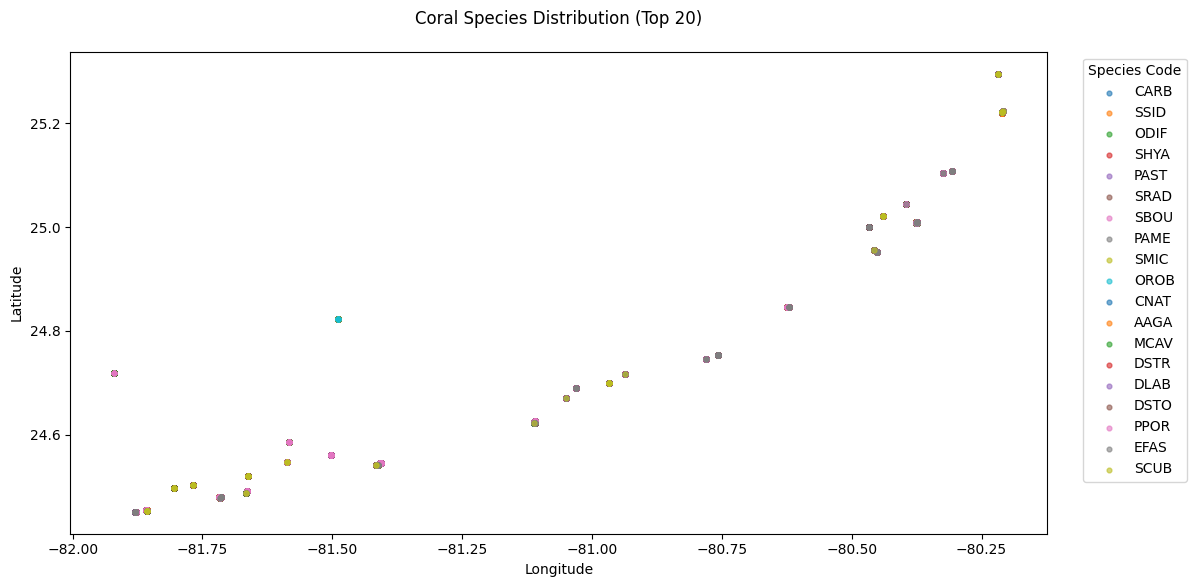

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

gdf = gpd.GeoDataFrame(
    scor_merged,
    geometry=gpd.points_from_xy(scor_merged.lonDD, scor_merged.latDD),
    crs="EPSG:4326"
)

# Plot species distribution with error handling
fig, ax = plt.subplots(figsize=(12, 8))

# Get top 20 species with actual presence
valid_species = [
    species for species in gdf['scor_SPP_CODE'].unique()[:20]
    if not gdf[gdf['scor_SPP_CODE'] == species].empty
]

# Plot each species with validation
for species in valid_species:
    subset = gdf[gdf['scor_SPP_CODE'] == species]
    if not subset.empty:
        subset.plot(
            ax=ax,
            label=species,
            markersize=12,
            alpha=0.6,
            aspect='equal'  # Force equal aspect ratio
        )

plt.legend(bbox_to_anchor=(1.15, 1), title='Species Code')
plt.title('Coral Species Distribution (Top 20)', pad=20)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

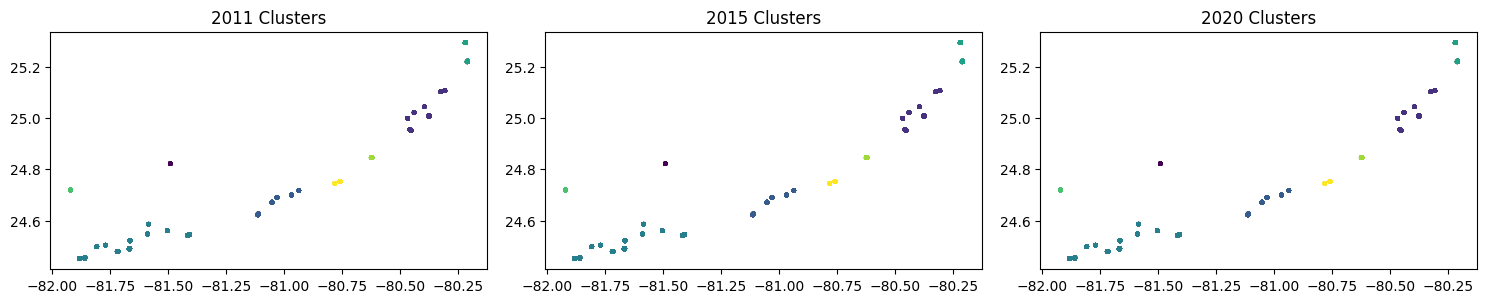

In [ ]:
from sklearn.cluster import DBSCAN

def temporal_cluster_analysis(year):
    year_data = gdf[gdf['scor_Year'] == year]

    # Check if there are any data points for the year
    if year_data.empty:
        print(f"No data found for year {year}.")
        return None

    coords = year_data[['latDD', 'lonDD']].values

    # DBSCAN for density-based clustering
    db = DBSCAN(eps=0.1, min_samples=10).fit(coords)
    year_data['cluster'] = db.labels_

    return year_data

# Compare clusters between two years
cluster_2010 = temporal_cluster_analysis(2011)
cluster_2015 = temporal_cluster_analysis(2015)
cluster_2020 = temporal_cluster_analysis(2020)

# Only proceed if data exists for both years
if cluster_2010 is not None and cluster_2020 is not None and cluster_2015 is not None:
    # Plot clusters for comparison
    fig, ax = plt.subplots(1, 3, figsize=(15, 6))

    cluster_2010.plot(ax=ax[0], column='cluster', cmap='viridis', markersize=5)
    ax[0].set_title('2011 Clusters')

    cluster_2015.plot(ax=ax[1], column='cluster', cmap='viridis', markersize=5)
    ax[1].set_title('2015 Clusters')

    cluster_2020.plot(ax=ax[2], column='cluster', cmap='viridis', markersize=5)
    ax[2].set_title('2020 Clusters')

    plt.tight_layout()
    plt.show()
else:
    print("Insufficient data for comparison.")


In [ ]:
import statsmodels.api as sm

# Prepare data for regression
model_data = gdf[['scor_Percent_recent_mortality', 'Depth_ft', 'latDD', 'lonDD']].dropna()
X = model_data[['Depth_ft', 'latDD', 'lonDD']]
y = model_data['scor_Percent_recent_mortality']

# Add constant and fit model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                                  OLS Regression Results                                 
Dep. Variable:     scor_Percent_recent_mortality   R-squared:                       0.000
Model:                                       OLS   Adj. R-squared:                  0.000
Method:                            Least Squares   F-statistic:                     16.04
Date:                           Tue, 08 Apr 2025   Prob (F-statistic):           2.00e-10
Time:                                   17:06:37   Log-Likelihood:            -3.5312e+05
No. Observations:                         136024   AIC:                         7.062e+05
Df Residuals:                             136020   BIC:                         7.063e+05
Df Model:                                      3                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [ ]:
import folium
from folium.plugins import TimestampedGeoJson

# Create time-stamped features
features = []
for _, row in gdf.iterrows():
    features.append({
        'type': 'Feature',
        'geometry': {
            'type': 'Point',
            'coordinates': [row['lonDD'], row['latDD']]
        },
        'properties': {
            'time': str(row['scor_Year']),
            'species': row['scor_sciName'],
            'mortality': row['scor_Percent_recent_mortality']
        }
    })

# Create interactive map
m = folium.Map(location=[24.7, -81.0], zoom_start=7)
TimestampedGeoJson(
    {'type': 'FeatureCollection', 'features': features},
    period='P1Y',
    add_last_point=True,
    auto_play=False,
    loop=False
).add_to(m)
m.save('temporal_distribution.html')


### octo

In [ ]:
octo_merged = loc.merge(octo, left_on='StationID', right_on='octo_StationID', how='outer')
octo_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109346 entries, 0 to 109345
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   OID_                 109346 non-null  int64  
 1   Region               109346 non-null  object 
 2   Site_Code            109346 non-null  object 
 3   SiteID               109346 non-null  int64  
 4   Site_name            109346 non-null  object 
 5   Habitat              109346 non-null  object 
 6   Subregion            109346 non-null  object 
 7   StationID            109346 non-null  int64  
 8   First_Year_surveyed  109346 non-null  int64  
 9   length_m             109346 non-null  int64  
 10  Depth_ft             109346 non-null  int64  
 11  latDD                109346 non-null  float64
 12  lonDD                109346 non-null  float64
 13  latDeg               109346 non-null  float64
 14  latMin               109346 non-null  float64
 15  lonDeg           

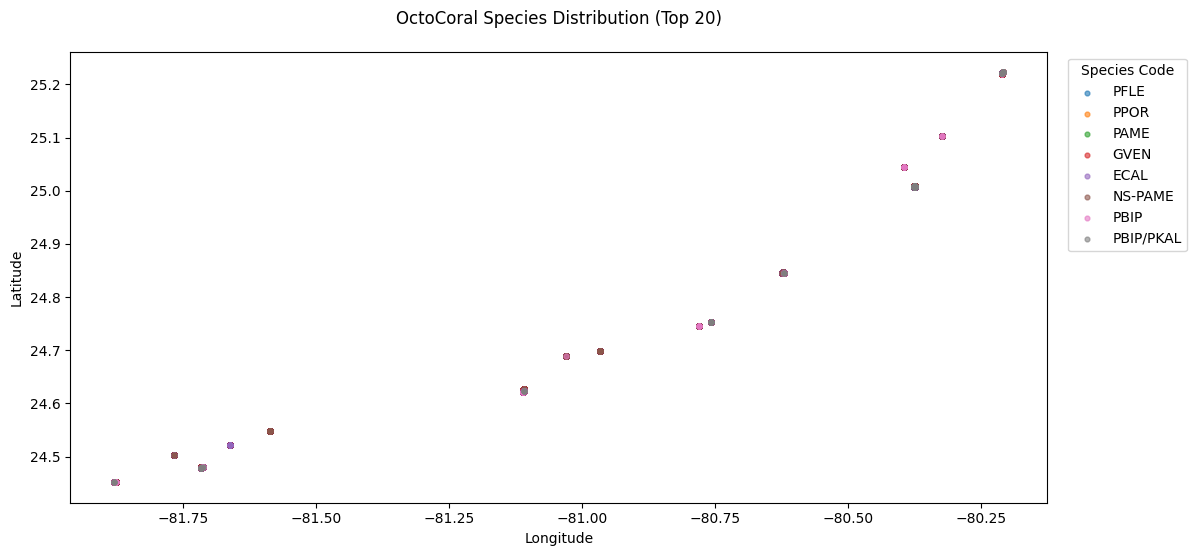

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

gdf = gpd.GeoDataFrame(
    octo_merged,
    geometry=gpd.points_from_xy(octo_merged.lonDD, octo_merged.latDD),
    crs="EPSG:4326"
)

# Plot species distribution with error handling
fig, ax = plt.subplots(figsize=(12, 8))

# Get top 20 species with actual presence
valid_species = [
    species for species in gdf['octo_SPP_Code'].unique()[:20]
    if not gdf[gdf['octo_SPP_Code'] == species].empty
]

# Plot each species with validation
for species in valid_species:
    subset = gdf[gdf['octo_SPP_Code'] == species]
    if not subset.empty:
        subset.plot(
            ax=ax,
            label=species,
            markersize=12,
            alpha=0.6,
            aspect='equal'  # Force equal aspect ratio
        )

plt.legend(bbox_to_anchor=(1.15, 1), title='Species Code')
plt.title('OctoCoral Species Distribution (Top 20)', pad=20)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

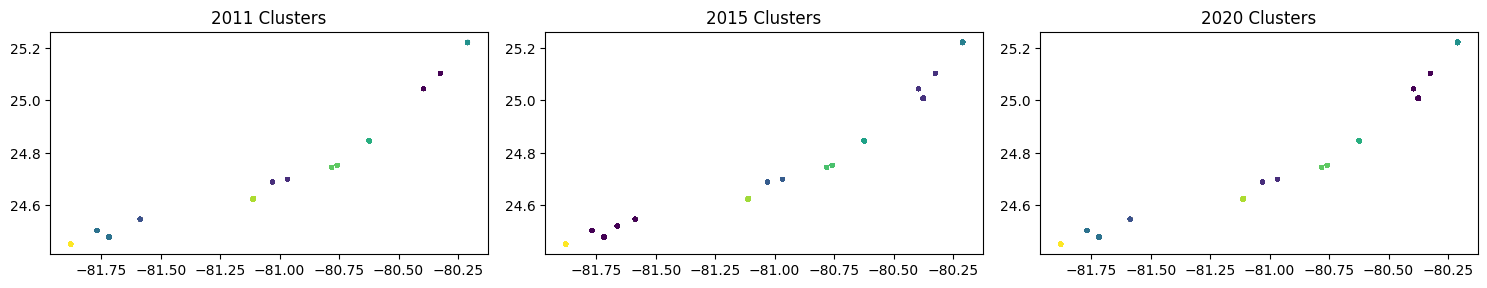

In [ ]:
from sklearn.cluster import DBSCAN

def temporal_cluster_analysis(year):
    year_data = gdf[gdf['octo_Year'] == year]

    # Check if there are any data points for the year
    if year_data.empty:
        print(f"No data found for year {year}.")
        return None

    coords = year_data[['latDD', 'lonDD']].values

    # DBSCAN for density-based clustering
    db = DBSCAN(eps=0.1, min_samples=10).fit(coords)
    year_data['cluster'] = db.labels_

    return year_data

# Compare clusters between two years
cluster_2010 = temporal_cluster_analysis(2011)
cluster_2015 = temporal_cluster_analysis(2015)
cluster_2020 = temporal_cluster_analysis(2020)

# Only proceed if data exists for both years
if cluster_2010 is not None and cluster_2020 is not None and cluster_2015 is not None:
    # Plot clusters for comparison
    fig, ax = plt.subplots(1, 3, figsize=(15, 6))

    cluster_2010.plot(ax=ax[0], column='cluster', cmap='viridis', markersize=5)
    ax[0].set_title('2011 Clusters')

    cluster_2015.plot(ax=ax[1], column='cluster', cmap='viridis', markersize=5)
    ax[1].set_title('2015 Clusters')

    cluster_2020.plot(ax=ax[2], column='cluster', cmap='viridis', markersize=5)
    ax[2].set_title('2020 Clusters')

    plt.tight_layout()
    plt.show()
else:
    print("Insufficient data for comparison.")


In [ ]:
import statsmodels.api as sm

# Prepare data for regression
model_data = gdf[['scor_Percent_recent_mortality', 'Depth_ft', 'latDD', 'lonDD']].dropna()
X = model_data[['Depth_ft', 'latDD', 'lonDD']]
y = model_data['scor_Percent_recent_mortality']

# Add constant and fit model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                                  OLS Regression Results                                 
Dep. Variable:     scor_Percent_recent_mortality   R-squared:                       0.000
Model:                                       OLS   Adj. R-squared:                  0.000
Method:                            Least Squares   F-statistic:                     16.04
Date:                           Tue, 08 Apr 2025   Prob (F-statistic):           2.00e-10
Time:                                   17:06:37   Log-Likelihood:            -3.5312e+05
No. Observations:                         136024   AIC:                         7.062e+05
Df Residuals:                             136020   BIC:                         7.063e+05
Df Model:                                      3                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [ ]:
import folium
from folium.plugins import TimestampedGeoJson

# Create time-stamped features
features = []
for _, row in gdf.iterrows():
    features.append({
        'type': 'Feature',
        'geometry': {
            'type': 'Point',
            'coordinates': [row['lonDD'], row['latDD']]
        },
        'properties': {
            'time': str(row['scor_Year']),
            'species': row['scor_sciName'],
            'mortality': row['scor_Percent_recent_mortality']
        }
    })

# Create interactive map
m = folium.Map(location=[24.7, -81.0], zoom_start=7)
TimestampedGeoJson(
    {'type': 'FeatureCollection', 'features': features},
    period='P1Y',
    add_last_point=True,
    auto_play=False,
    loop=False
).add_to(m)
m.save('temporal_distribution.html')
